# Байесовская статистика, DS-поток.
## Задание BS.3
### Марковские цепи. PageRank.

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.
**Баллы за задание:**

* Задача 1 &mdash; 100 баллов;
* Задача 2 &mdash; 30 балла;
* Задача 3 &mdash; 30 балла;
* Задача 4 &mdash; 20 баллов;
* Задача 5 &mdash; 10 балла.

--------------

Для выполнения задания потребуются следующие библиотеки: bs4, urllib, networkx. Следующей командой можно их поставить (Linux):

`pip3 install -U beautifulsoup4 urllib3 networkx`

In [2]:
# Bot check

# HW_ID: ds_bs_3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

---
## PageRank

### Задача 1.

#### История

(Взято с <a href='https://ru.wikipedia.org/wiki/PageRank'>Википедии</a>)

В 1996 году Сергей Брин и Ларри Пейдж, тогда ещё аспиранты Стэнфордского университета, начали работу над исследовательским проектом BackRub — поисковой системой по Интернету, использующей новую тогда идею о том, что веб-страница должна считаться тем «важнее», чем больше на неё ссылается других страниц, и чем более «важными», в свою очередь, являются эти страницы. Через некоторое время BackRub была переименована в Google. Первая статья с описанием применяющегося в ней метода ранжирования, названного PageRank, появилась в начале 1998 года, за ней следом вышла и статья с описанием архитектуры самой поисковой системы.

Их система значительно превосходила все существовавшие тогда поисковые системы, и Брин с Пейджем, осознав её потенциал, основали в сентябре 1998 года компанию Google Inc., для дальнейшего её развития как коммерческого продукта.

#### Описание

Введем понятие веб-графа. Ориентированный граф $G = (V, E)$ называется веб-графом, если 
* $V = \{url_i\}_{i=1}^n$ --- некоторое подмножество страниц в интернете, каждой из которых соответствует адрес $url_i$.
* Множество $E$ состоит из тех и только тех пар $(url_i, url_j)$, для которых на странице с адресом $url_i$ есть 
ссылка на $url_j$.

Рассмотрим следующую модель поведения пользователя. В начальный момент времени он выбирает некоторую страницу из $V$ в соответствии с некоторым распределением $\Pi^{(0)}$. Затем, находясь на некоторой странице, он может либо перейти по какой-то ссылке, которая размещена на этой странице, либо выбрать случайную страницу из $V$ и перейти на нее (damping factor). Считается, что если пользователь выбирает переход по ссылке, то он выбирает равновероятно любую ссылку с данной страницы и переходит по ней. Если же он выбирает переход не по ссылке, то он также выбирает равновероятно любую страницу из $V$ и переходит на ее (в частности может остаться на той же странице). Будем считать, что переход не по ссылке пользователь выбирает с некоторой вероятностью $p \in (0, 1)$. Соответственно, переход по ссылке он выбирает с вероятностью $1 - p$. Если же со страницы нет ни одной ссылки, то будем считать, что пользователь всегда выбирает переход не по ссылке.

Описанная выше модель поведения пользователя называется моделью PageRank. Нетрудно понять, что этой модели соответствует некоторая марковская цепь. Опишите ее.
* Множество состояний: сами ссылки $V$
* Начальное распределение: $\Pi^{(0)}$
* Переходные вероятности: $P(i, j) = p \frac{Has(i, j)}{Volume(i)}  + (1-p) \frac{1}{|V|}$ если $Has(i, j)=1$ иначе $P(i, j) = \frac{1}{|V|}$

  Где $Has(i, j)=1$ если на странице $i$ есть $url_j$ и $Volume(i)$ - общее число ссылок на странице $i$ (можно явно через $E$ пересчитать - надо посмотреть на сечение с ребрами из $url_i$)

#### Вычисление

Данная марковская цепь является эргодической. Почему?

<Ответ> Вероятности перехода постоянные + ненулевые

А это означает, что цепь имеет некоторое эргодическое распределение $\Pi$, которое является предельным и единственным стационарным. Данное распределение называется весом PageRank для нашего подмножества интернета

Как вычислить это распределение $\Pi$ для данного веб-графа? Обычно для этого используют степенной метод (power iteration), суть которого состоит в следующем. Выбирается некоторое начальное распределение $\Pi^{(0)}$. Далее производится несколько итераций по формуле $\Pi^{(k)} = \Pi^{(k - 1)} P$, где $P$ --- матрица переходных вероятностей цепи, до тех пор, пока $\left\|\Pi^{(k)} - \Pi^{(k - 1)}\right\| > \varepsilon$. Распределение $\Pi^{(k)}$ считается приближением распредения $\Pi$.

Имеет ли смысл выполнять подобные итерации для разных начальных распределений $\Pi^{(0)}$ с точки зрения теории?

<Ответ> Нет, передельное не зависит от начального в силу эргодичности

А с точки зрения практического применения, не обязательно при этом доводя до сходимости?

<Ответ> Достаточно приближения - поэтому мы ограничиваемся точностью $\varepsilon$

Какая верхняя оценка на скорость сходимости?

<Ответ> $O(\frac{\log(1/\varepsilon)}{p^k})$ т.к. собственные числа матриц $\sim p$ а точность $\varepsilon$ 

**Часть 1**


In [4]:
from time import sleep
from itertools import product
import numpy as np
from scipy.stats import bernoulli

import networkx
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style="whitegrid")

from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.parse import urlparse, urlunparse

Реализуйте вычисление весов PageRank power-методом.

Реализовать может быть удобнее с помощью функции np.nan_to_num, которая в данном numpy.array заменит все вхождения nan на ноль. Это позволяет удобно производить поэлементное деление одного вектора на другой в случае, если во втором векторе есть нули.

*Подсказка: диагональные матрицы легче возводить в степень.*

In [32]:
def create_page_rank_markov_chain(links, damping_factor=0.15):
    ''' По веб-графу со списком ребер links строит матрицу 
    переходных вероятностей соответствующей марковской цепи.
    
        links --- список (list) пар вершин (tuple), 
                может быть передан в виде numpy.array, shape=(|E|, 2);
        damping_factor --- вероятность перехода не по ссылке (float);
        
        Возвращает prob_matrix --- numpy.matrix, shape=(|V|, |V|).
    '''

    links = np.array(links)
    N = links.max() + 1  # Число веб-страниц
    
    transition_matrix = np.zeros((N, N))
    for src, dst in links:
        transition_matrix[src, dst] += 1
    
    outgoing_links = transition_matrix.sum(axis=1)
    for i in range(N):
        if outgoing_links[i] == 0:
            transition_matrix[i] = 1.0 / N
        else:
            transition_matrix[i] /= outgoing_links[i]
    
    teleport_matrix = np.ones((N, N)) / N
    return (1 - damping_factor)*transition_matrix + damping_factor*teleport_matrix


def page_rank(links, start_distribution, damping_factor=0.15, 
              tolerance=10 ** (-7), return_trace=False):
    ''' Вычисляет веса PageRank для веб-графа со списком ребер links 
    степенным методом, начиная с начального распределения start_distribution, 
    доводя до сходимости с точностью tolerance.
    
        links --- список (list) пар вершин (tuple), 
                может быть передан в виде numpy.array, shape=(|E|, 2);
        start_distribution --- вектор размерности |V| в формате numpy.array;
        damping_factor --- вероятность перехода не по ссылке (float);
        tolerance --- точность вычисления предельного распределения;
        return_trace --- если указана, то возвращает список распределений во 
                            все моменты времени до сходимости
    
        Возвращает:
        1). если return_trace == False, то возвращает distribution --- 
        приближение предельного распределения цепи,
        которое соответствует весам PageRank.
        Имеет тип numpy.array размерности |V|.
        2). если return_trace == True, то возвращает также trace ---
        список распределений во все моменты времени до сходимости. 
        Имеет тип numpy.array размерности 
        (количество итераций) на |V|.
    '''
    
    prob_matrix = create_page_rank_markov_chain(links, damping_factor)
    
    dist = np.array(start_distribution, dtype=float).reshape(1, -1)
    trace = [dist.flatten().copy()] if return_trace else []
    
    while True:
        new_dist = dist @ prob_matrix
        delta = np.linalg.norm(new_dist - dist)
        
        if return_trace:
            trace.append(new_dist.flatten().copy())
        
        if delta <= tolerance:
            dist = new_dist
            break
            
        dist = new_dist
    
    return (dist.ravel(), np.array(trace)) if return_trace else dist.ravel()

**Автоматическая проверка**

Реализацию функций `create_page_rank_markov_chain` и `page_rank` скопируйте в файл с названием `page_rank.py` и пришлите в бот вместе с заданием. Будет проверяться только корректность выдаваемых значений. Проверки на время работы не будет.

----------

Давайте посмотрим, как оно работает.
Напишите для начала функцию для генерации случайного ориентированного графа $G(n, p)$. Случайный граф генерируется следующий образом. Берется множество $\{0, ..., n-1\}$, которое есть множество вершин этого графа. Ребро $(i, j)$ (пара упорядочена, возможно повторение) добавляется в граф независимо от других ребер с вероятностью $p$.

In [75]:
def random_graph(n, p):
    edges = np.random.binomial(1, p, size=n**2)
    return [(i, j) for i in range(n) for j in range(n) if edges[i + j*n] == 1]

Теперь сгенерируем случайный граф и нарисуем его.

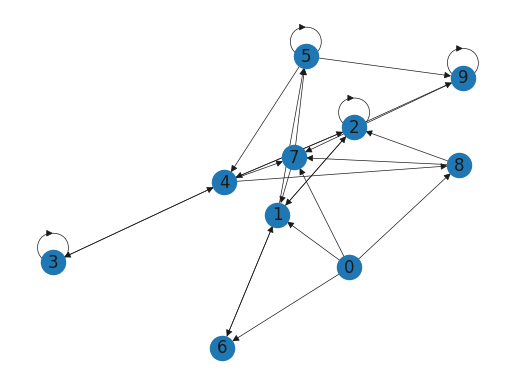

In [81]:
N, p = 10, 0.2
edges = random_graph(N, p)

G = networkx.DiGraph()
G.add_edges_from(edges)
plt.axis('off')
networkx.draw_networkx(G, width=0.5)

Посчитаем его PageRank и изобразим так, чтобы размер вершины был пропорционален ее весу.

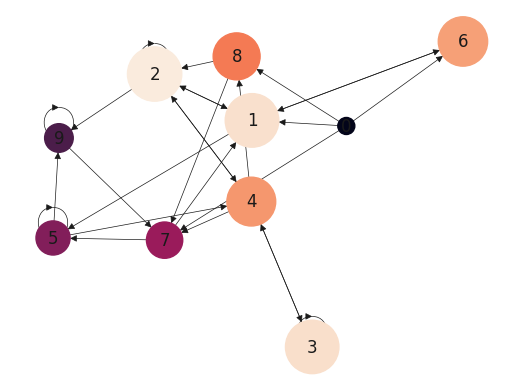

In [82]:
start_distribution = np.ones((1, N)) / N
pr_distribution = page_rank(edges, start_distribution)

size_const = 10 ** 4
plt.axis('off')
networkx.draw_networkx(G, width=0.5, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)

Как мы уже отмечали выше, эргодическая теорема дает верхнюю оценку на скорость сходимости. Давайте посмотрим, насколько она является точной. Для этого при вычислении PageRank нужно установить флаг return_trace.

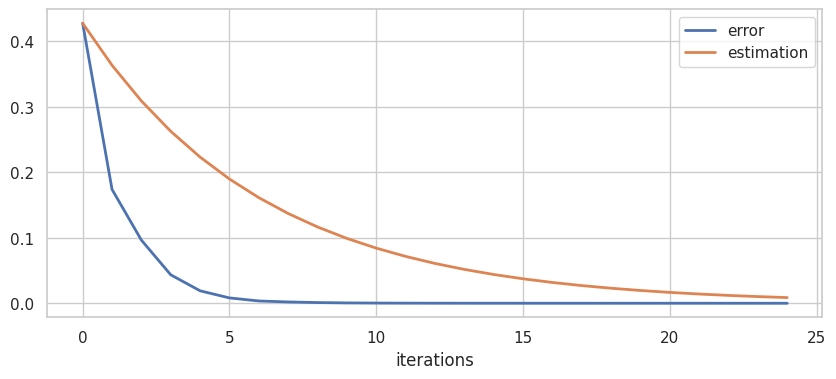

In [83]:
pr_distribution, pr_trace = page_rank(edges, start_distribution, 
                                      return_trace=True)
errors = np.abs(pr_trace - pr_trace[-1]).sum(axis=1)
x = np.arange(len(errors))
p = 0.15
upper_bound = errors[0] * (1 - p)**x

plt.figure(figsize=(10, 4))
plt.plot(x, errors, lw=2, label='error')
plt.plot(x, upper_bound, 
         lw=2, label='estimation')
plt.legend()
plt.xlabel('iterations')
plt.show()

<Выводы>

Оценка сходимости корретна; алгоритм действительно отдает предпочтения сайтам, на которые существует больше ссылок

Проведите небольшое исследование. В ходе исследования выясните, как скорость сходимости (количество итераций до сходимости) зависит от $n$ и $p$, а так же начального распределения. Вычислите также веса PageRank для некоторых неслучайных графов. В каждом случае стройте графики. От чего зависит вес вершины?

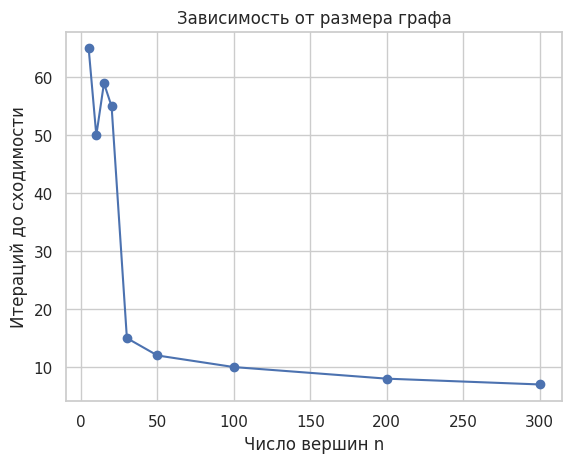

In [87]:
n_values = [5, 10, 15, 20, 30, 50, 100, 200, 300]
iterations = []

for n in n_values:
    edges = random_graph(n, 0.2)
    start_distribution = np.ones((1, n)) / n
    _, trace = page_rank(edges, start_distribution, return_trace=True)
    iterations.append(len(trace))

plt.plot(n_values, iterations, 'o-')
plt.xlabel("Число вершин n")
plt.ylabel("Итераций до сходимости")
plt.title("Зависимость от размера графа")
plt.show()

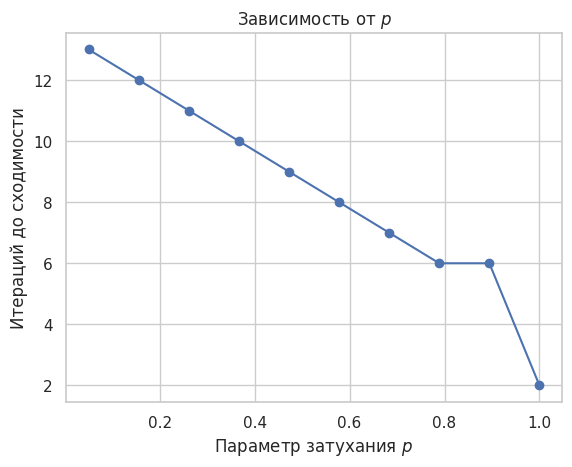

In [89]:
p_values = np.linspace(0.05, 1, 10)
iterations = []

for p in p_values:
    n = 50
    edges = random_graph(n, 0.2)
    start_distribution = np.ones((1, n)) / n
    _, trace = page_rank(edges, start_distribution,
                         damping_factor=p, return_trace=True)
    iterations.append(len(trace))

plt.plot(p_values, iterations, 'o-')
plt.xlabel("Параметр затухания $p$")
plt.ylabel("Итераций до сходимости")
plt.title("Зависимость от $p$")
plt.show()

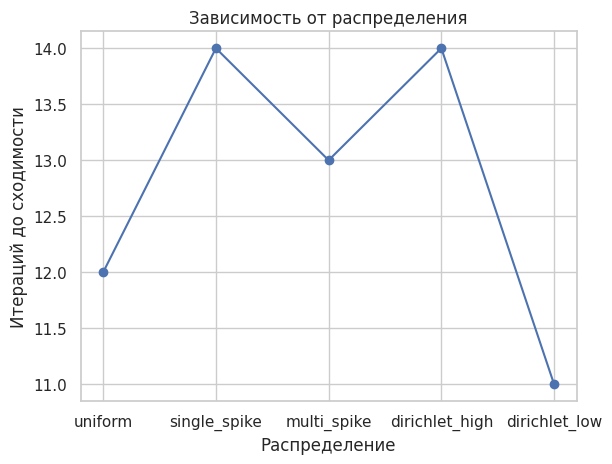

In [219]:
initial_distributions = {
    "uniform": lambda n: np.ones(n)/n,
    "single_spike": lambda n: np.eye(1, n, 0)[0],
    "multi_spike": lambda n: np.array([0.5] + [0.5/(n-1)]*(n-1)),
    "dirichlet_high": lambda n: np.random.dirichlet(np.ones(n)*0.1),
    "dirichlet_low": lambda n: np.random.dirichlet(np.ones(n)*10)
}
iterations = []

for dist in initial_distributions:
    n = 50
    start_distribution = initial_distributions[dist](n)
    edges = random_graph(n, 0.2)
    _, trace = page_rank(edges, start_distribution,
                         damping_factor=0.15, return_trace=True)
    iterations.append(len(trace))

plt.plot(list(initial_distributions.keys()), iterations, 'o-')
plt.xlabel("Распределение")
plt.ylabel("Итераций до сходимости")
plt.title("Зависимость от распределения")
plt.show()

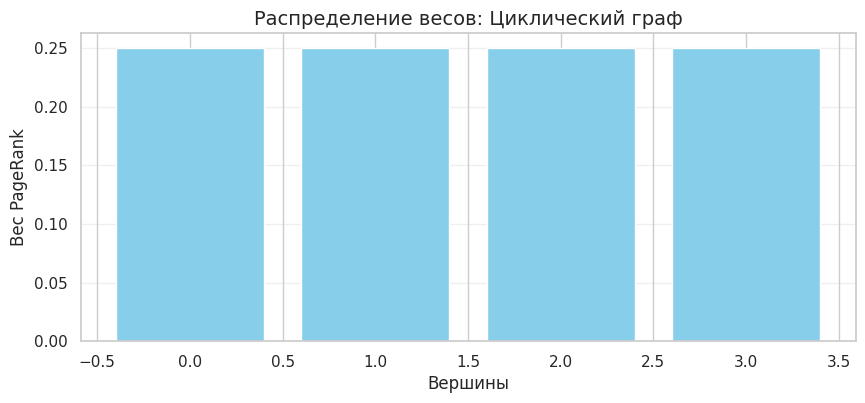

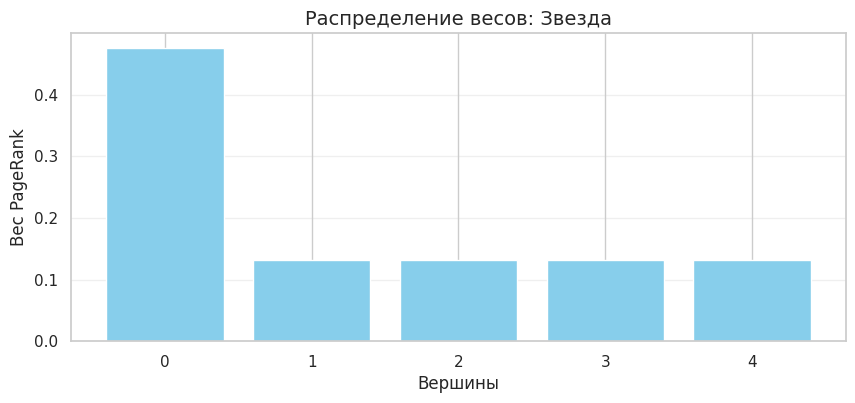

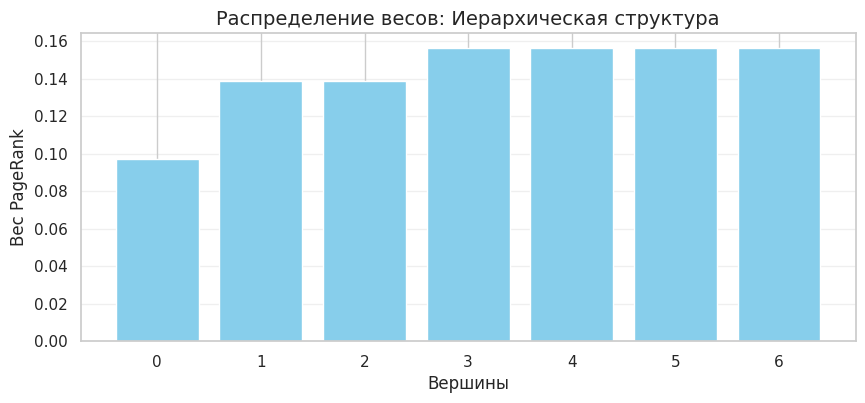

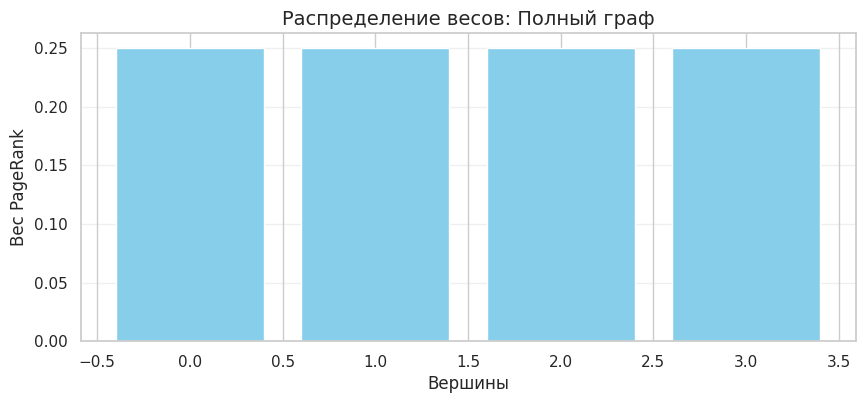

In [108]:
def plot_pagerank(links, title):
    n = max([max(u,v) for u,v in links]) + 1 if links else 0
    start = np.ones(n)/n
    pr = page_rank(links, start)
    
    plt.figure(figsize=(10, 4))
    plt.bar(range(n), pr, color='skyblue')
    plt.xlabel("Вершины", fontsize=12)
    plt.ylabel("Вес PageRank", fontsize=12)
    plt.title(f"Распределение весов: {title}", fontsize=14)
    plt.grid(axis='y', alpha=0.3)
    plt.show()

cycle_links = [(0,1), (1,2), (2,3), (3,0)]
plot_pagerank(cycle_links, "Циклический граф")

star_links = [(0,1), (0,2), (0,3), (0,4), 
             (1,0), (2,0), (3,0), (4,0)]
plot_pagerank(star_links, "Звезда")

hierarchy_links = [(0,1), (0,2),
                  (1,3), (1,4),
                  (2,5), (2,6)]
plot_pagerank(hierarchy_links, "Иерархическая структура")

complete_links = [(i,j) for i in range(4) for j in range(4) if i != j]
plot_pagerank(complete_links, "Полный граф")

Выводы

Больше $p$ - быстрее сходимость.

Маленькие $n$ долго сходятся (нестабильность), быстрые - быстрее (стабильные)

Более сглаженные распределения лучше сходятся

Веса получаются через ссылки от других вершин, плюс случайная компонента

**Часть 2**

В этой части вам предстоит построить реальный веб-граф и посчитать его PageRank. Ниже определены вспомогательные функции.

In [90]:
def load_links(url, sleep_time=1, attempts=5, timeout=20):
    ''' Загружает страницу по ссылке url и выдает список ссылок, 
    на которые ссылается данная страница.
        url --- string, адрес страницы в интернете;
        sleep_time --- задержка перед загрузкой страницы;
        timeout --- время ожидания загрузки страницы;
        attempts --- число попыток загрузки страницы. 
        Попытка считается неудачной, если выбрасывается исключение.
    
        В случае, если за attempts попыток не удалось загрузить страницу,
        то последнее исключение пробрасывается дальше.
    '''
    
    sleep(sleep_time)
    parsed_url = urlparse(url)
    links = []

    # Попытки загрузить страницу
    for i in range(attempts):
        try:
            # Ловить исключения только из urlopen может быть недостаточно. 
            # Он может выдавать какой-то бред вместо исключения, 
            # из-за которого исключение сгенерирует BeautifulSoup
            soup = BeautifulSoup(urlopen(url, timeout=timeout), 'lxml')
            break
            
        except Exception as e:
            print(e)
            if i == attempts - 1:
                raise e

    for tag_a in soup('a'):  # Посмотр всех ссылочных тегов
        if 'href' in tag_a.attrs:
            link = list(urlparse(tag_a['href']))
            
            # Если ссылка является относительной,
            # то ее нужно перевести в абсолютную
            if link[0] == '': link[0] = parsed_url.scheme
            if link[1] == '': link[1] = parsed_url.netloc
            
            links.append(urlunparse(link))
            
    return links


def get_site(url):
    ''' По ссылке url возвращает адрес сайта. '''
    
    return urlparse(url).netloc

Код ниже загружает $N$ веб-страниц, начиная с некоторой стартовой страницы и переходя по ссылкам. Загрузка происходит методом обхода в ширину. Все собранные урлы страниц хранятся в urls. В links хранится список ссылок с одной страницы на другую. Особенность кода такова, что в urls хранятся все встреченные урлы, которых может быть сильно больше $N$. Аналогично, в links ребра могут ссылаться на страницы с номером больше $N$. Однако, все ребра из links начинаются только в первых $N$ страницах. Таким образом, для построения веб-графа нужно удалить все, что связано с вершинами, которые не входят в первые $N$.

Это очень примерный шаблон, к тому же не оптимальный. Можете вообще его не использовать и написать свое.

In [113]:
urls = ['https://thetahat.ru/']
site = get_site(urls[0])
links = []

N = 10
for i in range(N):
    try:
        # Загружаем страницу по урлу и извлекаем из него все ссылки
        # Не выставляйте sleep_time слишком маленьким, 
        # а то еще забанят где-нибудь
        links_from_url = load_links(urls[i], sleep_time=0.5)
        # Если мы хотим переходить по ссылкам только определенного сайта
        links_from_url = list(filter(lambda x: get_site(x) == site, 
                                     links_from_url))
        
        # Добавляем соответствующие вершины и ребра в веб-граф
        for j in range(len(links_from_url)):
            # Такая ссылка уже есть
            if links_from_url[j] in urls:
                links.append((i, urls.index(links_from_url[j])))
            
            # Новая ссылка
            else:
                links.append((i, len(urls)))
                urls.append(links_from_url[j])
                
    except:
        pass  # Не загрузилась с 5 попытки, ну и ладно

<urlopen error unknown url type: mailto>
<urlopen error unknown url type: mailto>
<urlopen error unknown url type: mailto>
<urlopen error unknown url type: mailto>
<urlopen error unknown url type: mailto>
'ascii' codec can't encode characters in position 21-31: ordinal not in range(128)
'ascii' codec can't encode characters in position 21-31: ordinal not in range(128)
'ascii' codec can't encode characters in position 21-31: ordinal not in range(128)
'ascii' codec can't encode characters in position 21-31: ordinal not in range(128)
'ascii' codec can't encode characters in position 21-31: ordinal not in range(128)
URL can't contain control characters. '/files/ad/main/2/Использование ИИ.pdf' (found at least ' ')
URL can't contain control characters. '/files/ad/main/2/Использование ИИ.pdf' (found at least ' ')
URL can't contain control characters. '/files/ad/main/2/Использование ИИ.pdf' (found at least ' ')
URL can't contain control characters. '/files/ad/main/2/Использование ИИ.pdf' (foun

In [180]:
def shorten_url(url, max_length=30):
    parsed = urlparse(url)
    # Оставляем только путь и убираем начальный слеш
    path = parsed.path.lstrip('/') 
    # Обрезаем слишком длинные пути
    if len(path) > max_length:
        path = path[:max_length-3] + '...'
    return f"{parsed.netloc[len('/thetahat.ru/'):]}/{path}"

Теперь выберите какой-нибудь сайт с небольшим количеством страниц (не более 1000).
Постройте полный веб-граф для этого сайта и визуализируйте его. При отрисовке выставляйте width не более 0.1, иначе получится ужасно некрасиво.

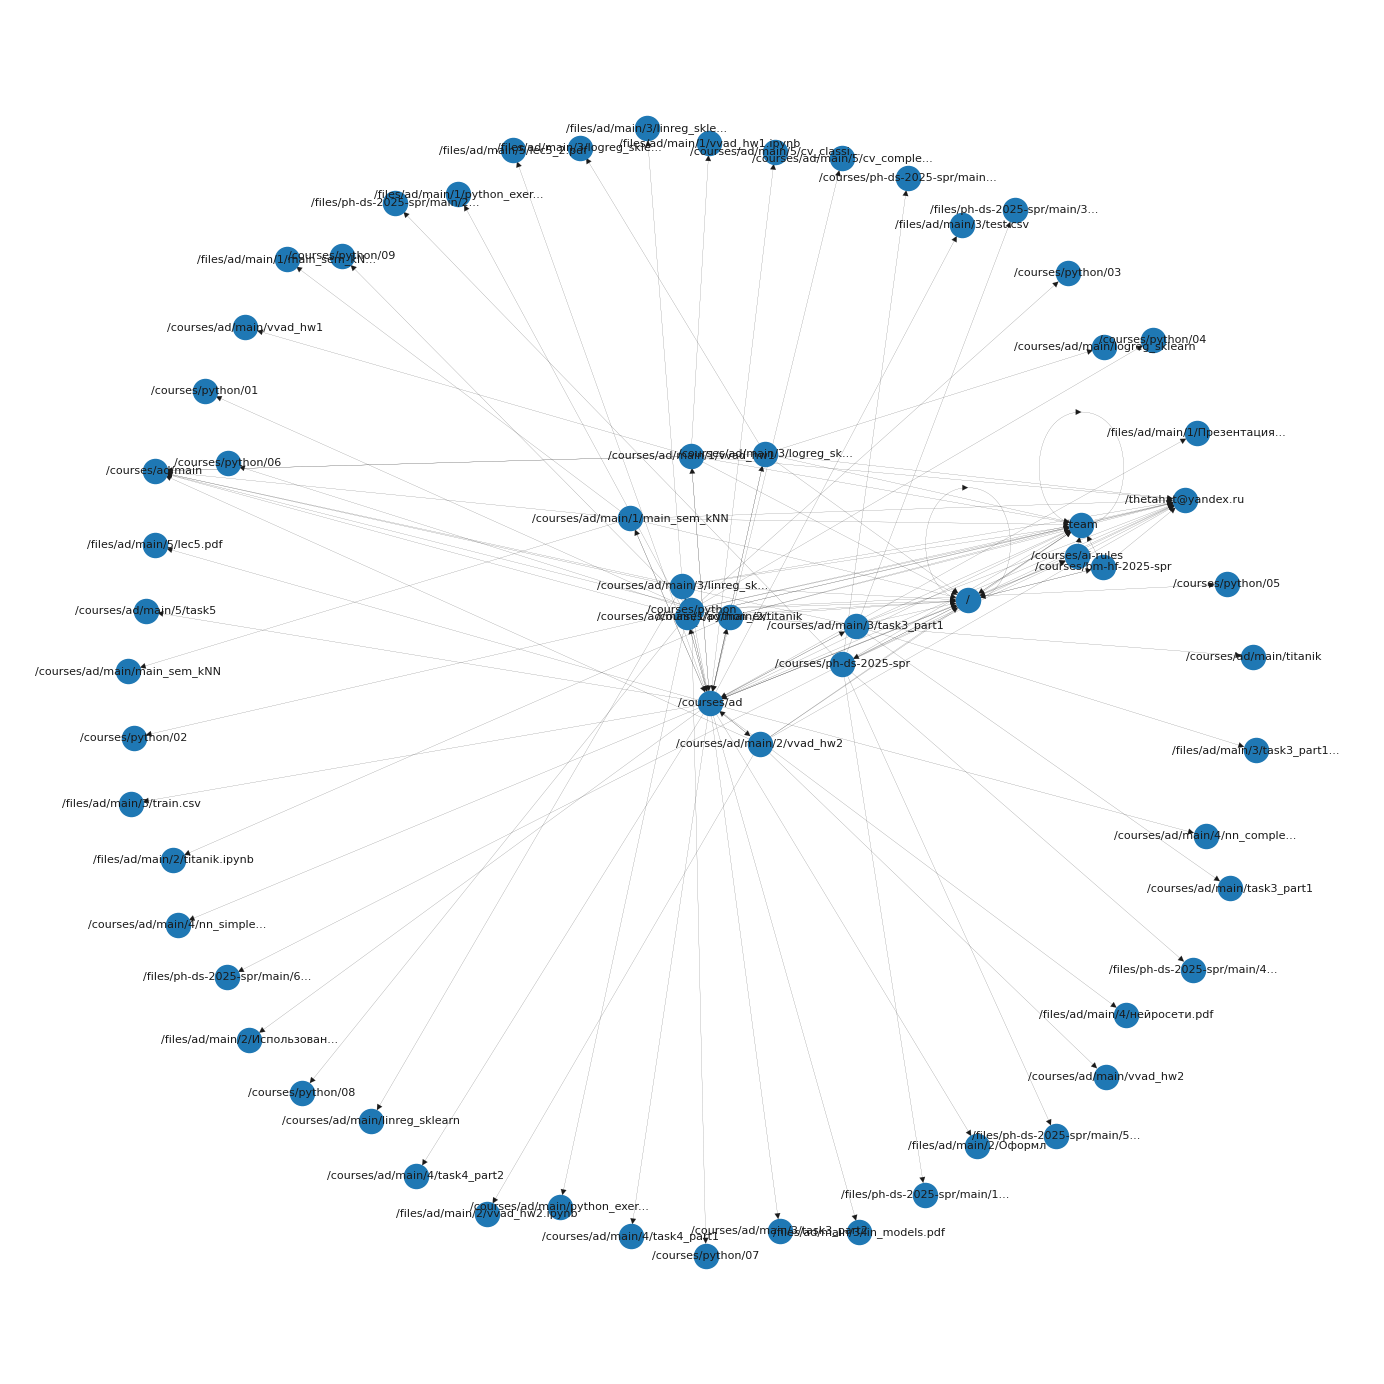

In [190]:
G = networkx.DiGraph()
G.add_edges_from(links)

labels = {}
for i in range(len(urls)):
    labels[i] = shorten_url(urls[i])
        
G = nx.relabel_nodes(G, labels)
pos = nx.spring_layout(G, k=0.5, iterations=100) 

plt.figure(figsize=(14, 14))
plt.axis('off')
networkx.draw_networkx(G, width=0.1,
                       pos=pos,
                       font_size=8)
plt.tight_layout()

Посчитайте PageRank для этого веб-графа. Визуализируйте данный веб-граф, сделав размер вершин пропорционально весу PageRank (см. пример в части 1). Постройте гистограмму весов. Что можно сказать про скорость сходимости?

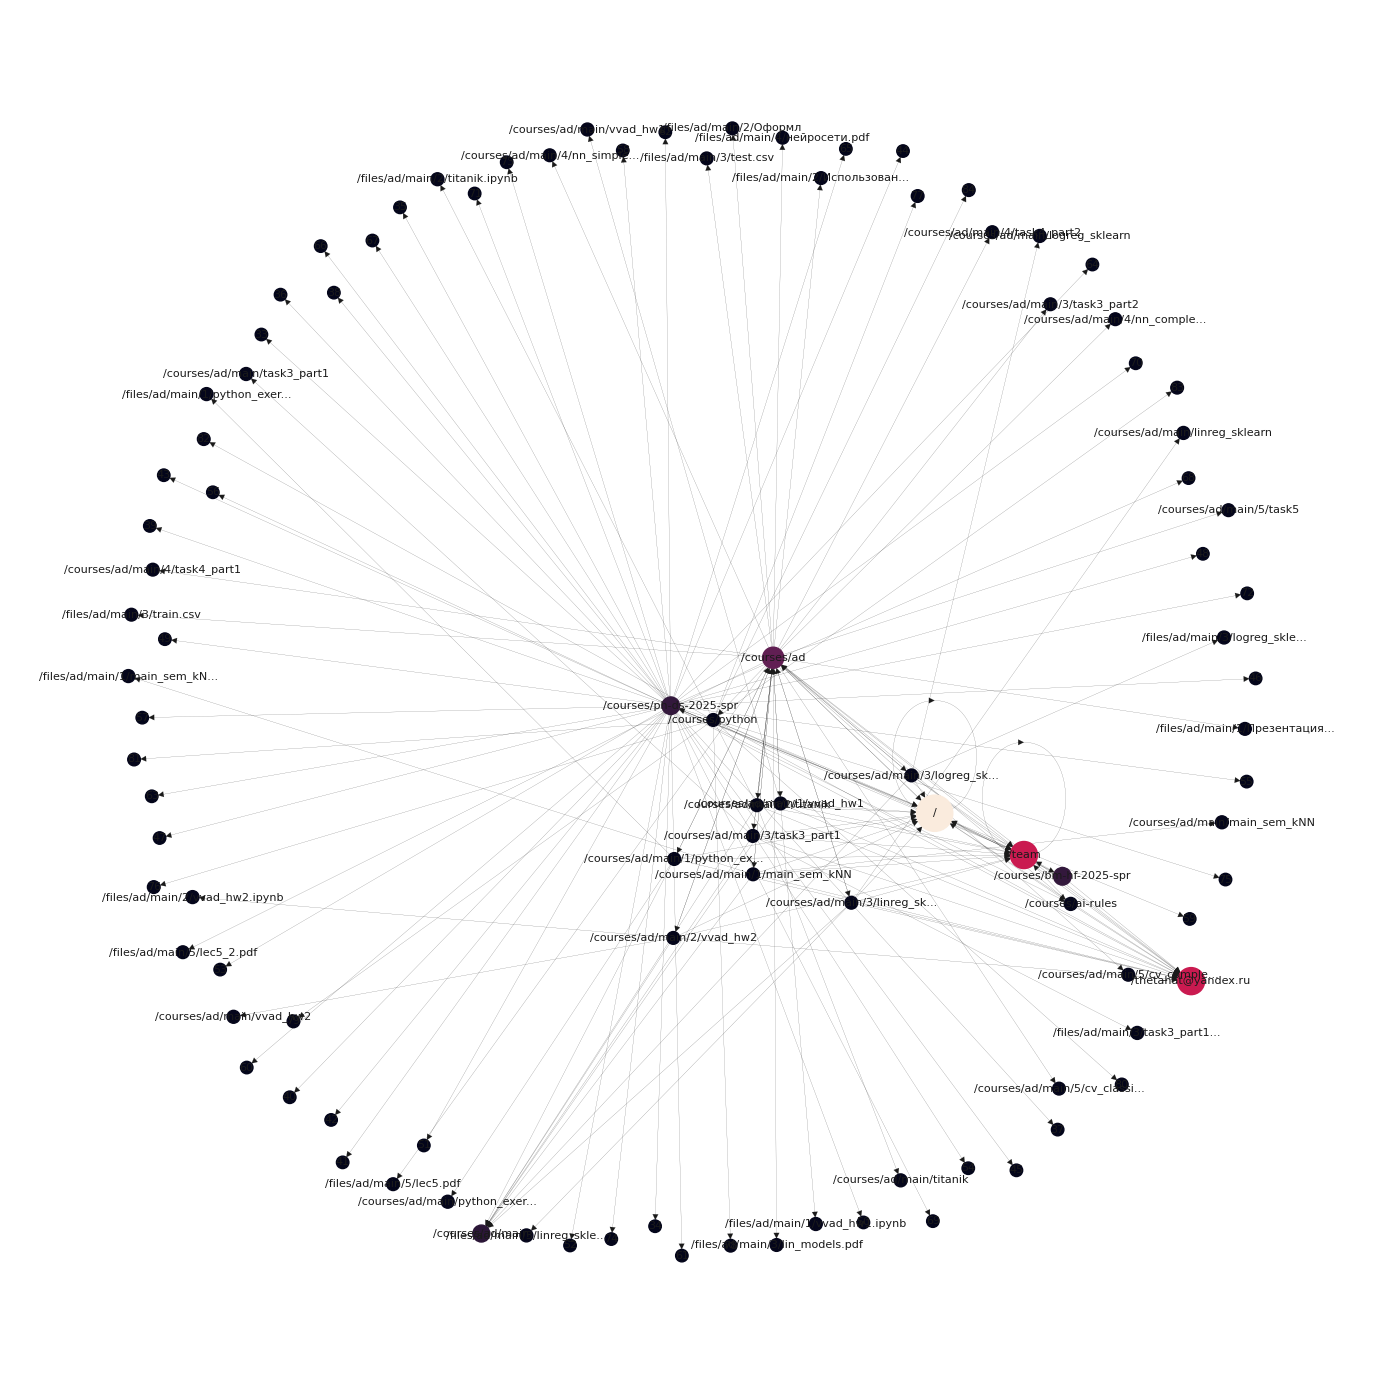

In [199]:
start_distribution = np.ones((1, len(urls))) / len(urls)1
pr_distribution = page_rank(links, start_distribution)

G = networkx.DiGraph()
G.add_edges_from(links)

top_n = 50
top_indices = np.argsort(-pr_distribution)[:top_n]

labels = {}
for i in range(len(urls)):
    if i in top_indices:
        labels[i] = shorten_url(urls[i])
    else:
        labels[i] = str(i) 
        
G = nx.relabel_nodes(G, labels)

pos = nx.spring_layout(G, k=0.5, iterations=100) 

plt.figure(figsize=(14, 14))
plt.axis('off')
networkx.draw_networkx(G, width=0.1,
                       pos=pos,
                       node_size=size_const * pr_distribution, 
                       node_color=pr_distribution,
                       font_size=8)
plt.tight_layout()

Для сходимости требуется ~20 итераций

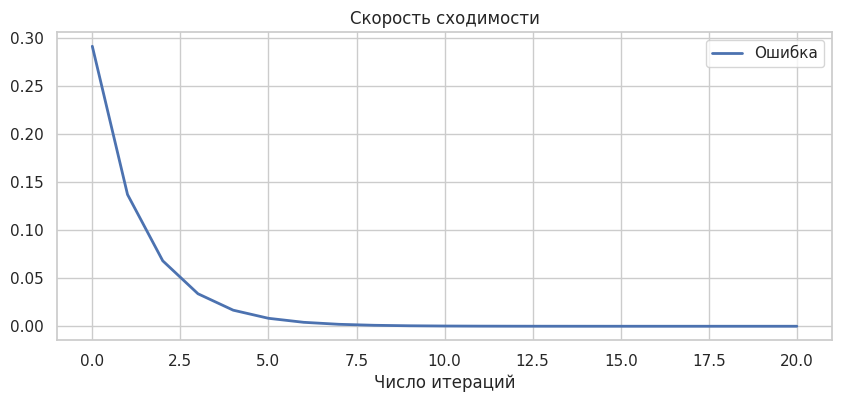

In [204]:
initial_distributions = {
    "uniform": lambda n: np.ones(n)/n,
    "single_spike": lambda n: np.eye(1, n, 0)[0],
    "multi_spike": lambda n: np.array([0.5] + [0.5/(n-1)]*(n-1)),
    "dirichlet_high": lambda n: np.random.dirichlet(np.ones(n)*0.1),
    "dirichlet_low": lambda n: np.random.dirichlet(np.ones(n)*10)
}

pr_distribution, pr_trace = page_rank(links, start_distribution, 
                                      return_trace=True)
errors = np.abs(pr_trace - pr_trace[-1]).sum(axis=1)
x = np.arange(len(errors))

plt.figure(figsize=(10, 4))
plt.title('Скорость сходимости')
plt.plot(x, errors, lw=2, label='Ошибка')
plt.legend()
plt.xlabel('Число итераций')
plt.show()

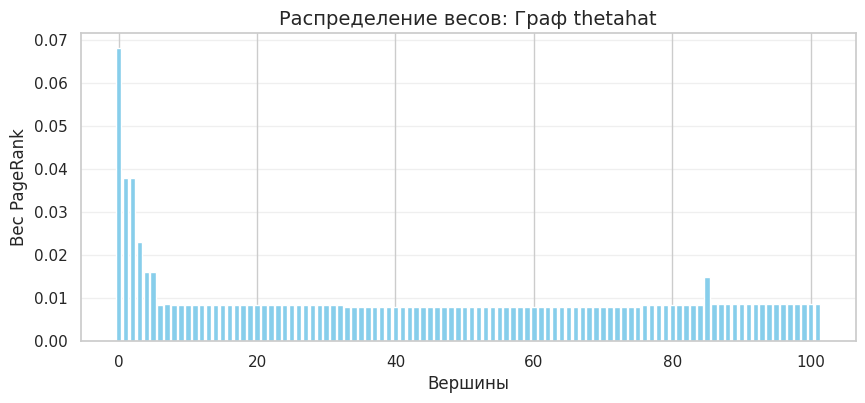

In [205]:
plot_pagerank(links, 'Граф thetahat')

Выделите небольшое количество (15-20) страниц с наибольшим весом и изобразите граф, индуцированный на этом множестве вершин. Что это за страницы? Почему именно они имеют большой вес?

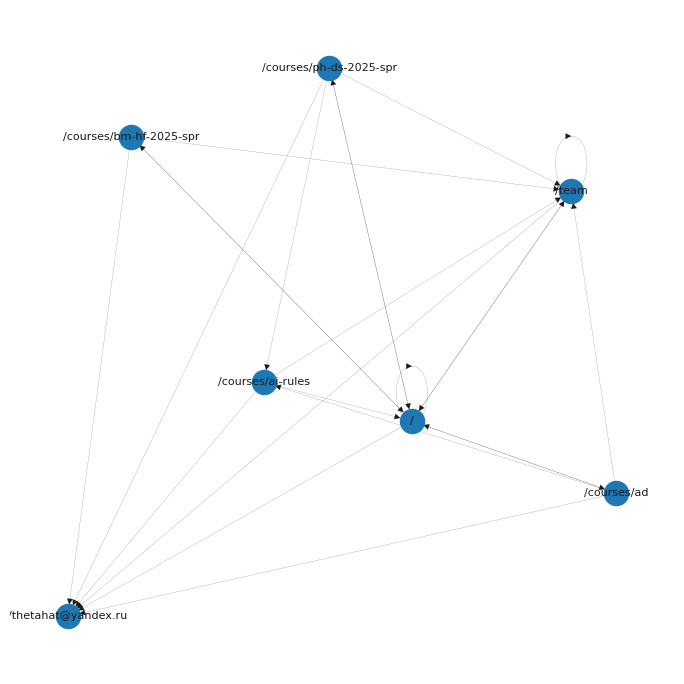

In [218]:
G = networkx.DiGraph()

top_n = 15
top_indices = np.argsort(-pr_distribution)[:top_n]

top_links = list(filter(lambda element: element[0] in top_indices and element[1] in top_indices, links))
G.add_edges_from(top_links)

labels = {}
for i in range(len(urls)):
    if i in top_indices:
        labels[i] = shorten_url(urls[i])
        
G = nx.relabel_nodes(G, labels)

pos = nx.spring_layout(G, k=0.5, iterations=100) 

plt.figure(figsize=(7, 7))
plt.axis('off')
networkx.draw_networkx(G, width=0.1,
                       pos=pos,
                       font_size=8)
plt.tight_layout()

Это самые главные страницы сайта, потому у них наибольшие веса

Как меняется вес PageRank для страниц в зависимости от начального приближения в случае, если не доводить итерационный процесс вычисления до сходимости? Какие выводы о поведении пользователя отсюда можно сделать?

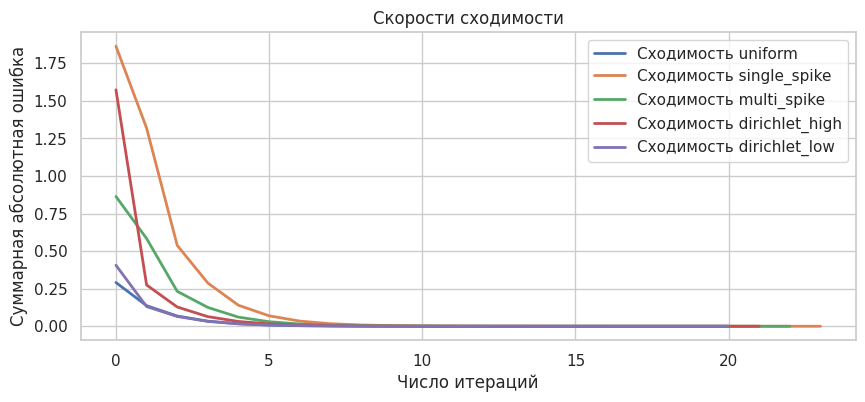

In [226]:
plt.figure(figsize=(10, 4))
plt.title(f'Скорости сходимости')

for name, distribution_func in initial_distributions.items():
    start_distribution = distribution_func(len(urls))

    pr_distribution, pr_trace = page_rank(links, start_distribution,
                                          return_trace=True)

    errors = np.abs(pr_trace - pr_trace[-1]).sum(axis=1)
    x = np.arange(len(errors))
    plt.plot(x, errors, lw=2, label=f'Сходимость {name}')
    
plt.legend()
plt.xlabel('Число итераций')
plt.ylabel('Суммарная абсолютная ошибка')    
plt.show()

Лучшую сходимость дают более равномерные распределения

Для получения дополнительных баллов проведите аналогичные исследования для больших сайтов. Так же вы можете провести исследования, не ограничиваясь загрузкой только одного сайта.

-----
### Задача 2.
Пусть в модели PageRank пользователь браузера в дополнение к кликам по ссылкам один раз(после каждого клика по ссылке) может перейти по кнопке *Назад* и вернуться на предыдущую страницу. Можно ли такую модель описать с помощью однородной марковской цепи? Если да, опишите, если нет, докажите.

Да. Достаточно поменять пространство состояний - теперь это пара из текущей страницы и предыдущей. Остается поменять вероятности переходов - можно добавить параметр $p'$, с гарантией $p + p' \leq 1$ и считать $p'$ вероятностью сразу вернуться назад, иначе с вероятностью $1-p'$ действовать как в прыдудущей задачи. Это марковская цепь, потому что вероятности перехода будут зависеть только от текущего состояния. Кроме того, она будет однородной - потому что вероятности не зависят от шага.

-----
### Задача 3.

Марковская цепь $(\xi_n,n\in{\mathbb Z}_{+})$ имеет начальное состояние $\xi_0=0$ и переходные вероятности ${\sf P}(\xi_{n+1}=k+1|\;\xi_{n}=k)=p$, ${\sf P}(\xi_{n+1}=k|\;\xi_{n}=k)=1-p$, $k,n\in{\mathbb N}$, $p\in[0,1]$. Найдите распределение $\xi_n$. Докажите, что последовательность $\tau_0=0$, $\tau_{k}=\min\{n:\;\xi_n=k\}$ также является цепью Маркова и найдите ее переходные вероятности.

Заметим, что $\xi_n$ это в сущности биномиальное $Bin(n, p)$ как сумма единичек с вероятностью $p$ - банально потому, что с вероятностью $p$ прибавляем 1, а $1-p$ не прибавляем. Это определение серии испытаний Бернулли

Положим $\tau_k = n_k$, откуда получаем $\xi_{n_k} = k$.  

Положим $\tau_{k+1} = n_{k+1}$, следовательно $\xi_{n_{k+1}} = k+1$ и $\xi_n < k+1$ для $n < n_{k+1}$.  

Поскольку $\xi_n$ — цепь Маркова, состояние $\xi_{n_{k+1}}$ зависит только от $\xi_{n_k} = k$, а не от состояний $\xi_n$ для $n < n_k$, то есть от значений $\tau_i$ при $i < k$.

Промежуточные значения $\xi_n$ при $n_k < n < n_{k+1}$ ни на что не влияют, потому что они гарантированно равны $\xi_{n_k}$

Получаем, что $\tau_i$ - Марковская цепь

-----
### Задача 4
Пусть $\{\xi_n,n\in\mathbb{Z}_+\}$ --- марковская цепь с фазовым пространством $S=\{1, ..., N\}$ и матрицей переходных вероятностей
$$
\begin{pmatrix}
q & p & 0 & 0 & ... & 0\\
q & 0 & p & 0 & ... & 0\\
q & 0 & 0 & p & ... & 0 \\
... \\
q & 0 & 0 & 0 & ... & p \\
1 & 0 & 0 & 0 & ... & 0
\end{pmatrix},
$$
где $0 < p < 1, q = 1-p$. Нарисуйте граф, соответствующей данной марковской цепи, и найдите предельное распределение.

Тороплюсь, поэтому опишу словесно граф, извините

Для вершин с индексами $i < N$ есть ребро в $1$ с весом $q$ и ребро в $i + 1$ с весом $p$

Для вершины $N$ единственное ребро в $1$ с весом $1$

Найдем предельное распределение.

$\pi = \pi P$

Имеем
$$\pi_i = p\pi_{i-1}, 1 < i$$
$$\sum_i \pi_i = 1$$


Осталось свернуть геометрическую прогрессию в последнем уравнении

$$\sum_i \pi_i = \pi_1 \frac{1-p^N}{1-p} = 1$$

Откуда имеем

$$\pi_i = \frac{q}{1-p^N}p^{i-1}$$

-----
### Задача 5
Докажите, что если однородная марковская цепь с дискретным временем имеет несколько стационарных распределений, то их, на самом деле, бесконечно много.

Выпуклая оболочка этих распределений непуста и более чем счета (т.к. там хотя бы два различных распределения) и является множеством распределений (свойство конических оболочек распределений)

Стационарность наследуется по линейности.